# Analysis and visualisation of the top 250 rated movies on IMDB

This is my analysis of movie data which I have scraped from IMDB. The purpose of this project is to help me learn key skills in web scraping and data analysis with python.

The link to the IMDB webpage with the list of the top 250 rated movies of all time can be found [here](https://www.imdb.com/chart/top/?ref_=nv_mv_250).

The link to the data that I am using in this analysis can be found in the link below:

https://github.com/Jonathan-Challenger/Web-Scraping/blob/master/IMDB-movies/movie_data_clean.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from matplotlib import style

## Reading data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Jonathan-Challenger/Web-Scraping/master/IMDB-movies/movie_data_clean.csv")
df.head()

,Title,Year,Rating,Rating count,Genre
0,The Shawshank Redemption,1994,9.3,2225161,Drama
1,The Godfather,1972,9.2,1533467,Crime
2,The Godfather: Part II,1974,9.0,1073363,Crime
3,The Dark Knight,2008,9.0,2199162,Action
4,12 Angry Men,1957,8.9,650404,Drama


## Creating dataframe showing frequency of each genre of film in dataset and the average rating for each genre

In [3]:
genre = df.Genre.value_counts().reset_index()
genre.columns = ["Genre", "Frequency"]

In [4]:
genre['Percent (%)'] = round((genre.Frequency / 250), 2) * 100

In [5]:
genre['Percent (%)'] = genre['Percent (%)'].astype(int)

In [6]:
genres = []
for i in df.Genre:
    if i not in genres:
        genres.append(i)
        

In [7]:
def avg_rating(data, col, item):
    g = data[data[col] == item]
    rat = g.Rating.mean()
    return rat

In [17]:
ratings = []
for p in genres:
    rating = round((avg_rating(df, 'Genre', p)), 2)
    ratings.append(rating)
    
genre.head()

,Genre,Frequency,Percent (%),Avg_rating
0,Drama,75,30,8.29
1,Crime,36,14,8.36
2,Action,36,14,8.36
3,Comedy,25,10,8.24
4,Adventure,23,9,8.26


### Table showing frequency and average rating of each genre

In [9]:
genre['Avg_rating'] = pd.Series(ratings)
genre.style.background_gradient(cmap = 'Blues')

,Genre,Frequency,Percent (%),Avg_rating
0,Drama,75,30,8.290000
1,Crime,36,14,8.360000
2,Action,36,14,8.360000
3,Comedy,25,10,8.240000
4,Adventure,23,9,8.260000
5,Animation,22,9,8.530000
6,Biography,22,9,8.270000
7,Mystery,4,2,8.250000
8,Western,3,1,8.330000
9,Horror,3,1,8.300000


### Figure showing average rating of each genre

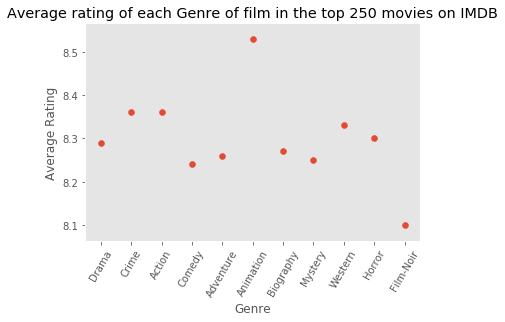

In [10]:
style.use("ggplot")
pyplot.scatter(genre.Genre, genre.Avg_rating)
pyplot.xlabel("Genre")
pyplot.grid(b = None)
pyplot.ylabel("Average Rating")
pyplot.title("Average rating of each Genre of film in the top 250 movies on IMDB")
pyplot.xticks(rotation = 60)
pyplot.show()

## Creating dataframe showing the years with the most highest rated films on IMDB

In [11]:
pop_year = df.Year.value_counts().reset_index()
pop_year.columns = ["Year", "Number of films"]
pop_year = pop_year.head(11)
pop_year

,Year,Number of films
0,1995,8
1,2019,7
2,2014,7
3,1957,7
4,2000,6
5,2001,6
6,2004,6
7,2009,6
8,2006,5
9,1998,5


In [12]:
years = list(pop_year.Year)

rating = []
for i in years:
    r = round((avg_rating(df, 'Year', i)), 2)
    rating.append(r)

### Table showing years with the most highest rated films and the average rating of these years

In [13]:
pop_year['avg_rating'] = pd.Series(rating)
pop_year.style.background_gradient(subset = ["Number of films", "avg_rating"], cmap = 'Blues')

,Year,Number of films,avg_rating
0,1995,8,8.290000
1,2019,7,8.330000
2,2014,7,8.240000
3,1957,7,8.330000
4,2000,6,8.280000
5,2001,6,8.330000
6,2004,6,8.150000
7,2009,6,8.220000
8,2006,5,8.360000
9,1998,5,8.300000


## Creating a dataframe with only films with over 1 million ratings

In [14]:
high_rat = df[df["Rating count"] > 1000000]
high_rat.head()

,Title,Year,Rating,Rating count,Genre
0,The Shawshank Redemption,1994,9.3,2225161,Drama
1,The Godfather,1972,9.2,1533467,Crime
2,The Godfather: Part II,1974,9.0,1073363,Crime
3,The Dark Knight,2008,9.0,2199162,Action
5,Schindler's List,1993,8.9,1158683,Biography


## Creating a dataframe with films more recent than 2010

In [15]:
modern = df[df.Year > 2010]
modern.head()

,Title,Year,Rating,Rating count,Genre
25,Parasite,2019,8.6,377001,Comedy
29,Interstellar,2014,8.6,1402083,Adventure
42,Untouchable,2011,8.5,721263,Biography
44,Whiplash,2014,8.5,670177,Drama
49,Joker,2019,8.5,762295,Crime


In [16]:
modern.Genre.value_counts()

Drama        13
Action        8
Biography     7
Crime         5
Animation     5
Comedy        4
Adventure     3
Name: Genre, dtype: int64